In [2]:
#pkgs/utilities
import numpy as np
import pandas as pd
from functools import partial
from copy import deepcopy
import time

#graphics/appearance (turn on code folding!)
%matplotlib inline
import pylab as pl
import matplotlib as mpl
mpl.rc("figure", facecolor="gray") #for dark themes
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import tempytron_lib
reload(tempytron_lib)
from tempytron_lib import *

Run .py 

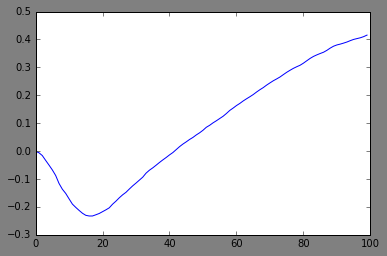

In [5]:
weights_list=np.load('data/v1_st_momentum'+'cur_weights_list.npy')
teacher_weights=np.load('data/v1_st_momentum'+'teacher_weights.npy')
pl.plot([np.dot(teacher_weights,weights)/np.sqrt(np.dot(teacher_weights,teacher_weights)*np.dot(weights,weights)) for weights in weights_list])

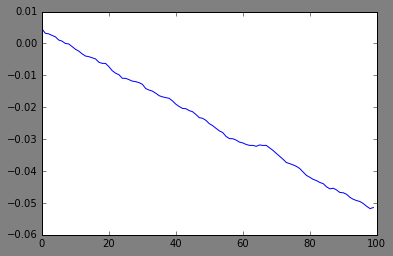

In [8]:
weights_list=np.load('data/v1_st_momentum'+'cur_weights_list.npy')
teacher_weights=np.load('data/v1_st_momentum'+'teacher_weights.npy')
pl.plot([np.dot(teacher_weights,weights)/np.sqrt(np.dot(teacher_weights,teacher_weights)*np.dot(weights,weights)) for weights in weights_list])

In [6]:
error=[np.sum(np.power(weights-teacher_weights,2)) for weights in weights_list]

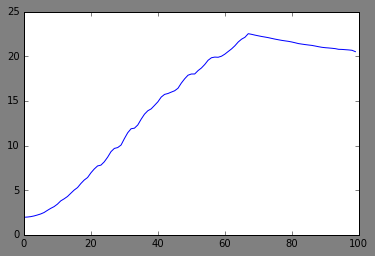

In [7]:
pl.plot(error)

new version:

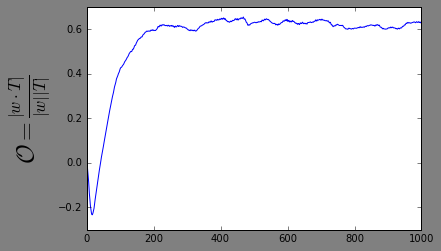

In [19]:
weights_list=np.load('data/v2_st_momentum'+'cur_weights_list.npy')
teacher_weights=np.load('data/v2_st_momentum'+'teacher_weights.npy')
fig,ax=pl.subplots(1,1)
ax.plot([np.dot(teacher_weights,weights)/np.sqrt(np.dot(teacher_weights,teacher_weights)*np.dot(weights,weights)) for weights in weights_list])
# pl.plot([np.dot(teacher_weights,weights)/len(weights) for weights in weights_list])
ax.set_ylabel(r'$\mathcal{O}=\frac{|w\cdot T|}{|w||T|}$',fontsize=24)

In [34]:
desired_numspkslist=np.load('data/v2_st_momentum'+'desired_spkslist.npy')
numspkslist=np.load('data/v2_st_momentum'+'numspkslist.npy')

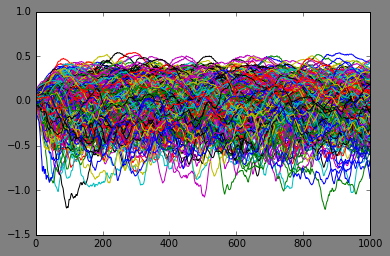

In [35]:
fig,ax=pl.subplots(1,1)
for row in weights_list.T:
    ax.plot(row)

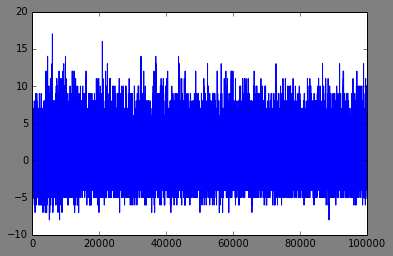

In [36]:
fig,ax=pl.subplots(1,1)
ax.plot(np.array(numspkslist-desired_numspkslist))

(array([  8.79500000e+03,   2.21070000e+04,   2.72580000e+04,
          2.16450000e+04,   1.21630000e+04,   5.41300000e+03,
          1.90500000e+03,   5.47000000e+02,   1.38000000e+02,
          2.20000000e+01,   6.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

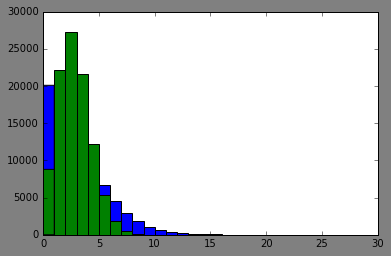

In [39]:
pl.hist(numspkslist,bins=np.arange(30))
pl.hist(desired_numspkslist,bins=np.arange(30))

(array([  6.20000000e+02,   3.40200000e+03,   8.83000000e+03,
          1.48900000e+04,   1.86460000e+04,   1.83470000e+04,
          1.46570000e+04,   9.95000000e+03,   5.74700000e+03,
          2.88100000e+03,   1.26800000e+03,   5.27000000e+02,
          1.76000000e+02,   4.00000000e+01,   1.30000000e+01,
          5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

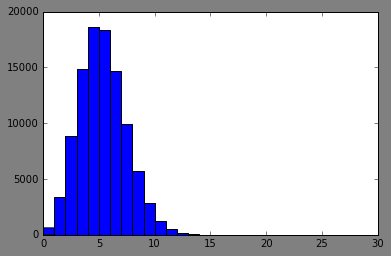

In [32]:
pl.hist(desired_numspkslist,bins=np.arange(30))

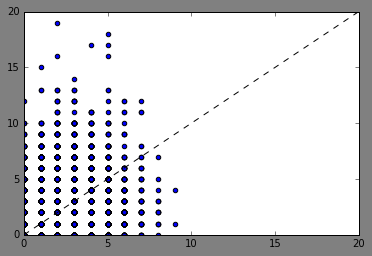

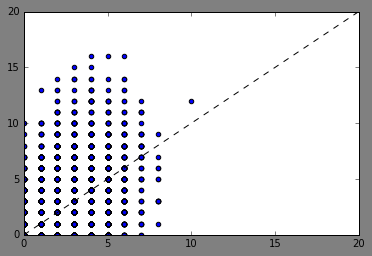

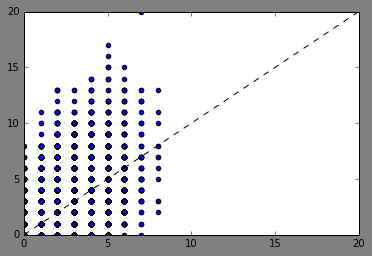

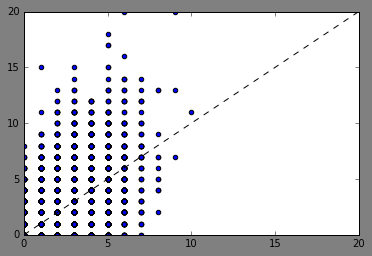

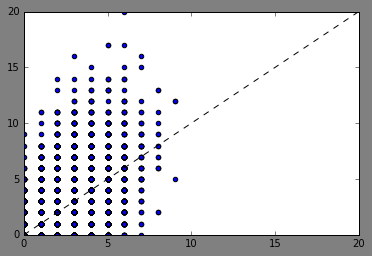

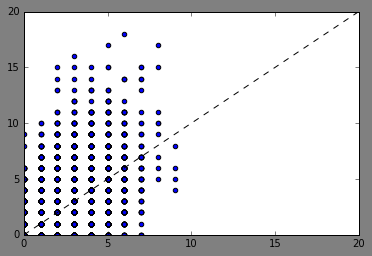

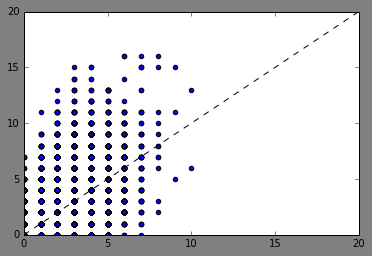

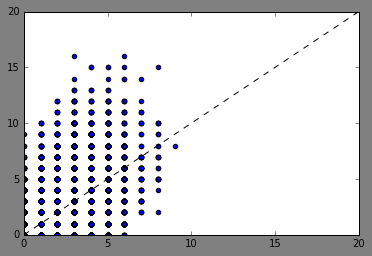

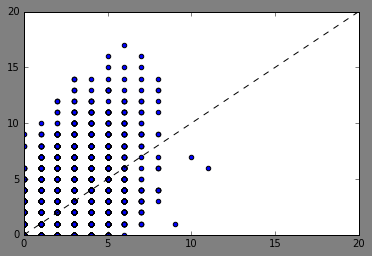

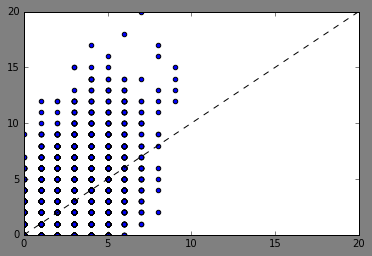

In [47]:
for start_it in range(0,100000,10000):
    fig,ax=pl.subplots(1,1)
    ax.scatter(desired_numspkslist[start_it:start_it+10000],numspkslist[start_it:start_it+10000])
    ax.set_xlim(0,20)
    ax.set_ylim(0,20)
    ax.plot(ax.get_xlim(),ax.get_xlim(),'k--')

In [42]:
len(desired_numspkslist)

100000